In [7]:
import math

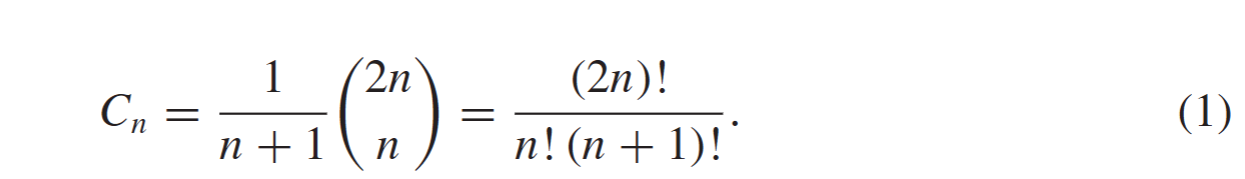

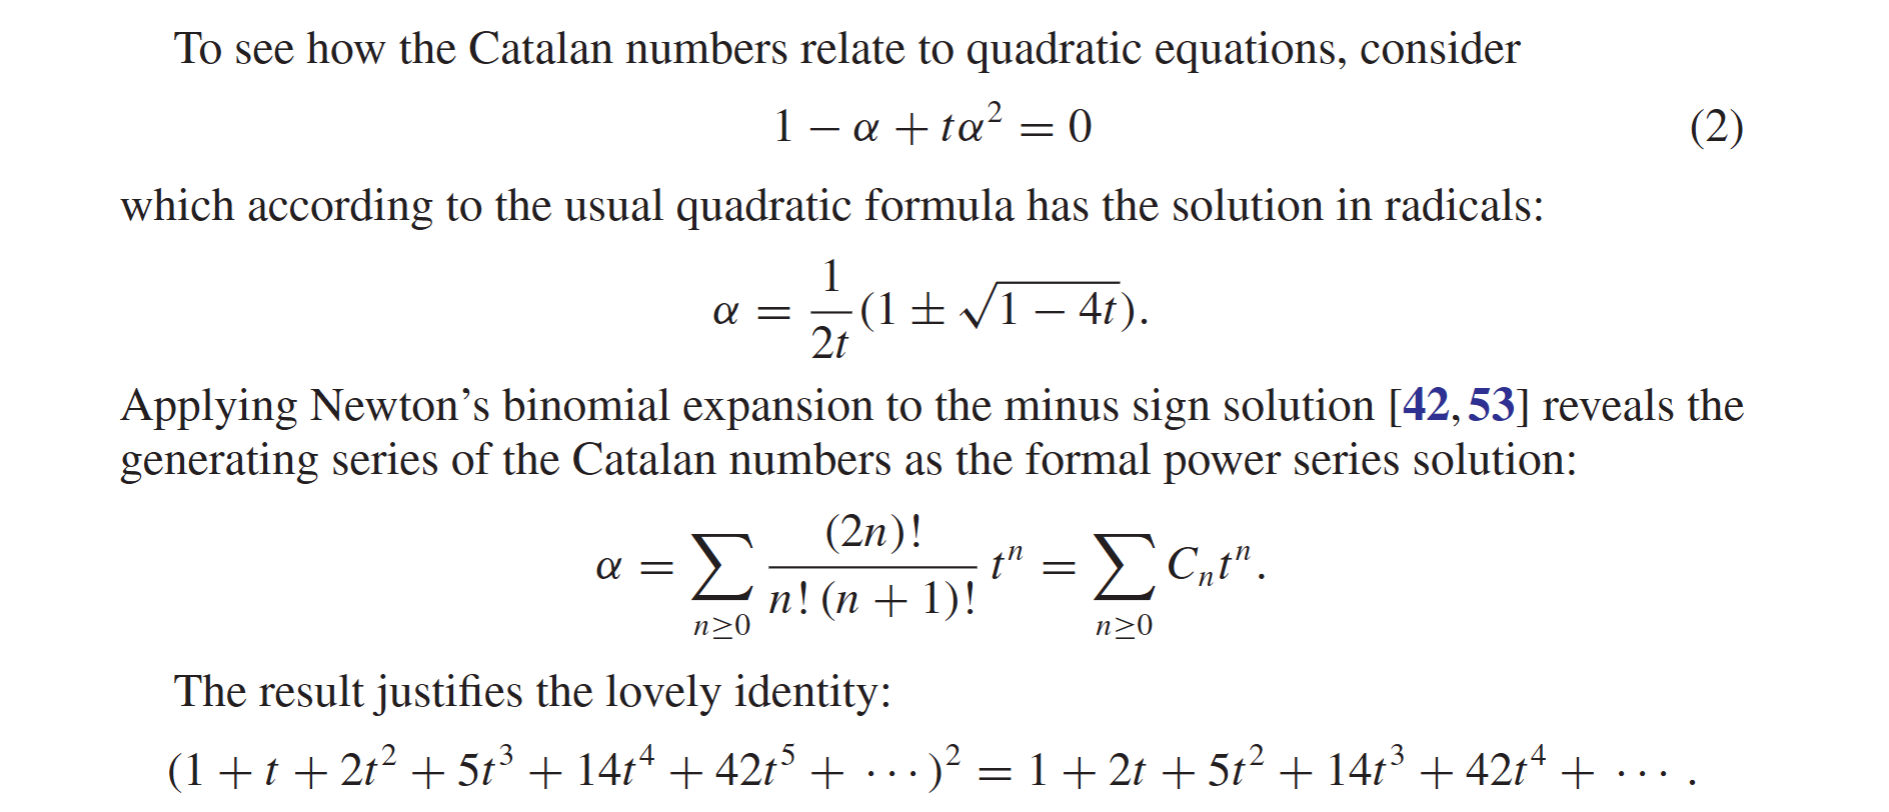

In [8]:
def C(n):
    # C(n) = (2n)! / (n!)(n+1)! = (n+1)*(n+2)*...*(2n)/(1*2*...*(n+1))
    a, b = 1, 1
    for k in range(2, n+1):
        a *= (n+k)
        b *= k
    return a//b

def generalized_binomial(r,n):
    result = 1
    for k in range(n):
        result *= (r-k)
        result /= (k+1)
    return result

In [9]:
def C(n):   
    result = 1
    for k in range(2, n+1):
        result *= (n+k)
        result /= k
    return result

N = 10
t = -2
val = sum(C(n)* t**n for n in range(N))
print(f"{val:.10f}")


-2170881.0000000000


In [10]:

N = 100
x = 3
r = 0.5
val = sum(generalized_binomial(r, n) * x**n for n in range(N))
print(f"{val:.10f}")

36897381732338865935269100862142478752415744.0000000000


In [11]:
N = 10000
x = -1
r = 0.5
val = sum(generalized_binomial(r, n) * x**n for n in range(N))
print(f"{val:.10f}")

0.0056421074


In [12]:
import math
def solve_quadratic_equation(a,b,c):
    disc = math.sqrt(b**2 - 4*a*c)
    return (-b+disc) / (2*a), (-b-disc) / (2*a)

t = -1
print(f"Equation: 1-a+{t}a^2")
results = solve_quadratic_equation(t, -1, 1)
print("formula results:",results)


Equation: 1-a+-1a^2
formula results: (-1.618033988749895, 0.6180339887498949)


In [13]:
def C(n):   
    result = 1
    for k in range(2, n+1):
        result *= (n+k)
        result /= k
    return result

# c0 = -1
# c1 = -1
# c2 = 2

c0 = 9
c1 = 9
c2 = 2

N = 100

#val = sum(C(n)* c0**(1+n)*c2**n/c1**(1+2*n) for n in range(N))
val = sum(C(n)* c0**(1+n)*c2**n/c1**(1+2*n) for n in range(N))
print(f"{val:.10f}")

1.4999999653


In [14]:
import math

def hyperC(m):
    A = sum((i + 2) * m_i for i, m_i in enumerate(m))
    B = sum((i + 1) * m_i for i, m_i in enumerate(m))
    
    log_numerator = math.lgamma(A + 1)
    log_denominator = math.lgamma(B + 2) + sum(math.lgamma(m_i + 1) for m_i in m)

    return round(math.exp(log_numerator - log_denominator))

In [15]:
for m2 in range(8):
    print([hyperC((m2,m3)) for m3 in range(6)])


[1, 1, 3, 12, 55, 273]
[1, 5, 28, 165, 1001, 6188]
[2, 21, 180, 1430, 10920, 81396]
[5, 84, 990, 10010, 92820, 813960]
[14, 330, 5005, 61880, 678300, 6864396]
[42, 1287, 24024, 352716, 4476780, 51482970]
[132, 5005, 111384, 1899240, 27457584, 354323970]
[429, 19448, 503880, 9806280, 159352050, 2283421140]


In [16]:
def C(n):
    numerator = math.lgamma(2 * n + 1)
    denominator = math.lgamma(n + 1) + math.lgamma(n + 2)
    return math.exp(numerator - denominator)

[C(n) for n in range(10)]

[1.0,
 1.0,
 1.9999999999999984,
 5.00000000000001,
 13.999999999999979,
 41.99999999999991,
 131.9999999999995,
 429.00000000000114,
 1430.0000000000036,
 4862.000000000012]

In [17]:
import math
D = 137
print(f"sqrt({D}) = {math.sqrt(D):.10f}")

sqrt(137) = 11.7046999107


In [18]:

D = 137
N = 4
#a = D
a = 2 ** (D.bit_length() // 2)
for n in range(N):
    a = (a + D/a) / 2
print(f"Newton's method: sqrt({D}) = {a:.10f}")


Newton's method: sqrt(137) = 11.7046999107


In [19]:
N = 2
a = 2
for n in range(N):
    a = (2*a**3+5) / (3*a**2-2)
print(f"Newton's method: {a:.10f}")


Newton's method: 2.0945681211


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_polynomial(coeffs, x_min=-10, x_max=10, points=2000,
                    show_grid=True, show_axes=True, title=None):
    """
    Plot the polynomial P(x) = Σ c_k x^k.

    Parameters
    ----------
    coeffs : list[float]
        Coefficients [c0, c1, …, cn] with c_k = coefficient of x**k.
    x_min, x_max : float
        Interval on which to sample and display the curve.
    points : int
        Number of sample points between x_min and x_max.
    show_grid : bool
        Draw a background grid if True.
    show_axes : bool
        Draw x- and y-axes through the origin if True.
    title : str | None
        Custom title for the plot; defaults to “P(x) = …”.
    """
    x = np.linspace(x_min, x_max, points)
    # Evaluate P(x) efficiently with Horner's rule via np.polyval on reversed coeffs
    # (np.polyval expects descending powers).
    y = np.polyval(list(reversed(coeffs)), x)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x, y, linewidth=2)

    # Cosmetic extras ---------------------------------------------------------
    if show_axes:
        ax.axhline(0, color='black', linewidth=0.8)
        ax.axvline(0, color='black', linewidth=0.8)
    if show_grid:
        ax.grid(alpha=0.3)

    # Nice y-limits: 10 % padding above min/max
    y_min, y_max = y.min(), y.max()
    pad = 0.1 * (y_max - y_min or 1)   # avoid zero span
    ax.set_ylim(y_min - pad, y_max + pad)

    if title is None:
        # Build a small TeX-like label for the polynomial
        terms = [f"{c}" if k == 0 else
                 f"{'' if c == 1 else '-' if c == -1 else c}x" if k == 1 else
                 f"{'' if c == 1 else '-' if c == -1 else c}x^{k}"
                 for k, c in enumerate(coeffs) if c != 0]
        title = "P(x) = " + " + ".join(t.replace('+-', '- ') for t in terms)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("P(x)")
    plt.tight_layout()
    plt.show()


# ---------------------------------------------------------------------------
# EXA


In [21]:
def newton(coeffs, x0, N):
    numerator = [(n-1) * c for n, c in enumerate(coeffs)]
    denominator = [n * c for n, c in enumerate(coeffs[1:], start=1)]
    x = x0
    for _ in range(N):
        f_x = sum(c * x**n for n, c in enumerate(numerator))
        f_prime_x = sum(c * x**n for n, c in enumerate(denominator))
        if f_prime_x == 0:
            raise ValueError("Derivative is zero")
        x = f_x / f_prime_x
    return x

coeffs = [4, 1, -7, 2, 1]
#plot_polynomial(coeffs, x_min = -1, x_max=1)
x0 = 0
N = 40
result = newton(coeffs, x0, N)
print(f"Newton's method result: {result:.10f}")


Newton's method result: -3.8263294040


In [22]:
def partitions(N, k):
    if k == 1:
        return [[N]]
    result = []
    for n in range(N+1):
        for p in partitions(N-n, k-1):
            result.append([n] + p)
    return result

In [23]:
def subsCoeff(c, m):
    A = 1+sum((i + 1) * m_i for i, m_i in enumerate(m))  # i from 0 => i+2 from 2
    B = 1+sum((i + 2) * m_i for i, m_i in enumerate(m))  # i from 0 => i+2 - 1 = i+1
    
    log_numerator = A*math.log(c[0]) + sum(math.log(c[i+2])*m_val for i, m_val in enumerate(m))
    log_denominator = B*math.log(c[1])

    return round(math.exp(log_numerator - log_denominator))

In [24]:
import math
from functools import reduce

def signed_log_product(base, exponent):
    """
    Compute (sign, log(abs(base^exponent))) safely
    """
    if base == 0:
        return (0, -float('inf'))  # log(0) → -inf
    sign = 1 if base > 0 else (-1 if exponent % 2 == 0 else -1)
    return (sign, exponent * math.log(abs(base)))

def subsCoeff(c, m):
    # A = 1 + m2 + 2*m3 + 3*m4 + ...
    A = 1 + sum((i + 1) * m_i for i, m_i in enumerate(m))
    # B = 1 + 2*m2 + 3*m3 + 4*m4 + ...
    B = 1 + sum((i + 2) * m_i for i, m_i in enumerate(m))

    signs = []
    logs = []

    # c0^A
    s0, l0 = signed_log_product(c[0], A)
    signs.append(s0)
    logs.append(l0)

    # ∏ c_i^{m_i}, i = 2, 3, ...
    for i, m_i in enumerate(m):
        s, l = signed_log_product(c[i + 2], m_i)
        signs.append(s)
        logs.append(l)

    # Denominator: c1^B
    s_denom, l_denom = signed_log_product(c[1], B)
    signs.append(s_denom)
    logs.append(-l_denom)  # subtract in log-space

    # Final sign: product of signs
    final_sign = reduce(lambda a, b: a * b, signs)
    final_log = sum(logs)

    value = math.exp(final_log)
    return round(final_sign * value)


In [25]:
from sympy import symbols, Add
def generate_polynomial(N, k, t=None):
    if t is None:
        t = symbols(f't2:{k+2}')
    monomials = []
    for n in range(N+1):
        for m in partitions(n, k):
            coeff = hyperC(m)
            term = coeff
            for i, m_i in enumerate(m):
                if m_i != 0:
                    term *= t[i]**m_i
            monomials.append(term)
    F = Add(*monomials)
    return F

p = generate_polynomial(3,2)
print(p)

5*t2**3 + 21*t2**2*t3 + 2*t2**2 + 28*t2*t3**2 + 5*t2*t3 + t2 + 12*t3**3 + 3*t3**2 + t3 + 1


NameError: name 'k' is not defined

In [27]:
def shift_polynomial(coeffs, a):
    n = len(coeffs)
    shifted = [0] * n
    for i in range(n):
        shifted[i] = sum(
            coeffs[k] * math.comb(k, i) * a**(k-i)
            for k in range(i, n)
        )
    return shifted

shift_polynomial([-5, -2, 0, 1], 2)

[-1, 10, 6, 1]

In [141]:
import itertools
def catalan(coeffs, x0, N):
    coeffs = shift_polynomial(coeffs, x0)
    print("shifted coeffs:", coeffs)
    c0 = coeffs[0]
    c1 = -coeffs[1]
    k = len(coeffs) - 2
    t = symbols(f't2:{k+2}')
    Q = generate_polynomial(N, k, t)
    subs_dict = {t[i-2]: coeffs[i]*c0**(i-1)/c1**i for i in range(2,len(coeffs))}
    print("subs_dict: ", subs_dict)
    return x0 + (c0/c1) * Q.subs(subs_dict)
    

# coeffs = [-5, -2, 0, 1]
# x0 = 2
# N = 3
# result = x0 + catalan(coeffs, x0, N)
# print(f"Catalan method result: {result:.10f}")


In [81]:
coeffs = [-5, -2, 0, 1]
x0 = -1000000000000
N = 100
# result = catalan(coeffs, x0, N)
# print(f"Catalan method result: {result:.10f}")
result = newton(coeffs, x0, N)
print(f"Newton method result:  {result:.10f}")

Newton method result:  2.0945514815


In [144]:
import random
def random_coefficients(degree, lower_bound=-10, upper_bound=10):
    return [random.randint(lower_bound, upper_bound) for _ in range(degree + 1)]
random.seed(42)
coeffs = random_coefficients(10, -10, 10)
print(coeffs)
x0 = 100
N = 5
result = catalan(coeffs, x0, N)
print(f"Catalan method result: {result:.10f}")
result = newton(coeffs, x0, N)
print(f"Newton's method result: {result:.10f}")

[10, -7, -10, -2, -3, -3, -6, -7, 7, -8, 8]
shifted coeffs: [792069293969697899310, 79285550638487937993, 3571394520969819390, 95331895379698798, 1669968754098497, 20059590526397, 167329955094, 957125593, 3592807, 7992, 8]
subs_dict:  {t2: 0.45000041260073, t3: -0.12000033054799038, t4: 0.021000115854156575, t5: -0.002520023203057856, t6: 0.00021000290437999438, t7: -1.2000232667786129e-05, t8: 4.5001164913741176e-07, t9: -1.000033327899394e-08, t10: 1.0000417152568794e-10}
Catalan method result: 80.6474783702
Newton's method result: 59.0895153957


In [105]:
print(sum(c*result**i for i,c in enumerate(coeffs)))

-8.493206138382448e-15


In [ ]:
a**3-2*a-5

-3.4199518933533932